# Seaborn

## 데이터 불러오기

In [ ]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 회귀선이 있는 산점도

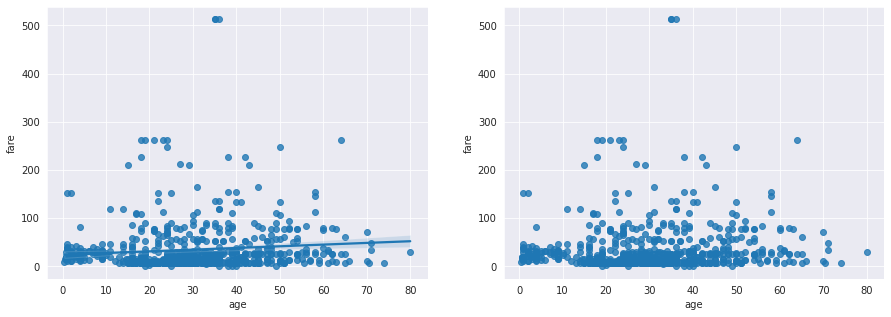

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1) # [v] [ ]
ax2 = fig.add_subplot(1, 2, 2) # [ ] [v]

sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg=False)
# fit_reg=False : 회귀선을 그리지 않음.

plt.show()

## 히스토그램 / 커널 밀도 그래프

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


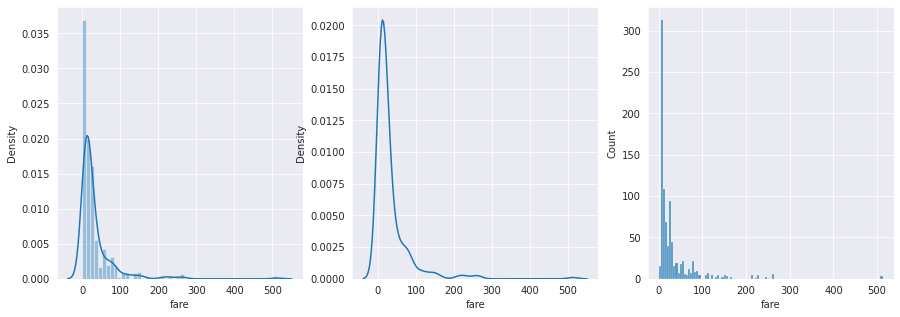

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(titanic['fare'], ax=ax1) # distribution 분포
sns.kdeplot(ax=ax2, x='fare', data=titanic) # kernel density estimate 커널 밀도 추정
sns.histplot(ax=ax3, x='fare', data=titanic) # histogram

plt.show()

## 히트맵

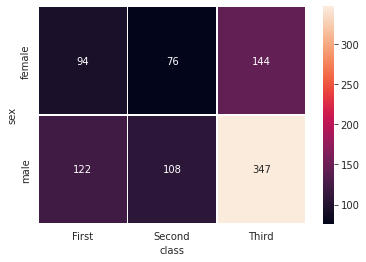

In [ ]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

sns.heatmap(table,
            annot=True, # 수치 표시
            fmt='d',
            linewidth=0.5,
            cbar=True) # 색깔바

plt.show()

## 범주형 데이터의 산점도

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


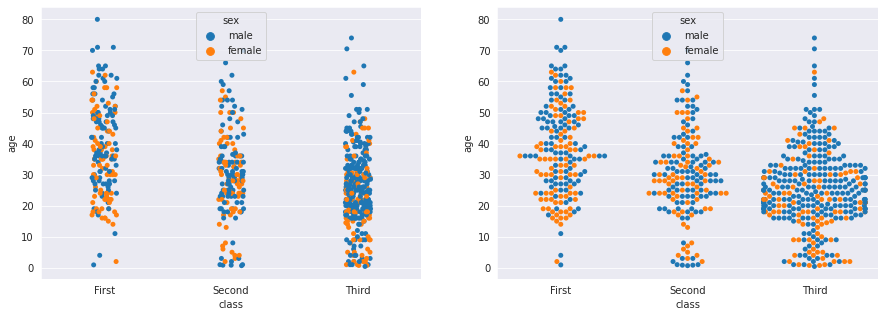

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.stripplot(x='class', y='age', data=titanic, ax=ax1, hue='sex') # stripplot
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2, hue='sex') # swarmplot
# hue = 'sex' : 성별을 기준으로 색깔을 분류함.

plt.show()

## 빈도 그래프

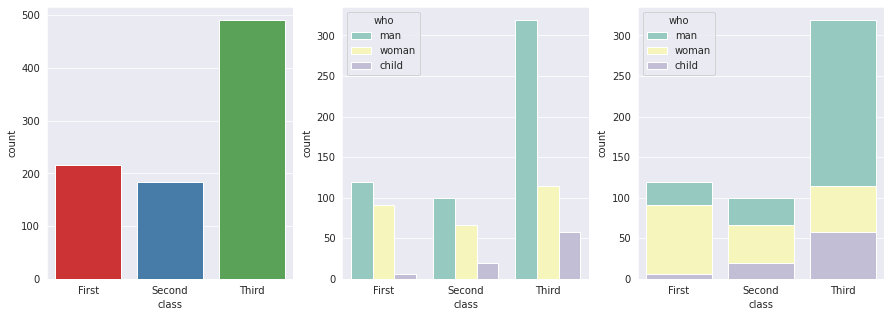

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
sns.countplot(x='class', palette='Set3', data=titanic, ax=ax2, hue='who')
# hue='who' : man/woman/child 간 분류 가능
sns.countplot(x='class', palette='Set3', data=titanic, ax=ax3, hue='who', dodge=False)
# dodge=False : 누적분포

plt.show()

## 박스 플롯/바이올린 그래프
- 박스 플롯 : 범주형 데이퍼 분포, 주요 통계 지표 제공
- 바이올린 그래프 : 분산 정도를 알기 위해 커널 밀도 함수를 추가

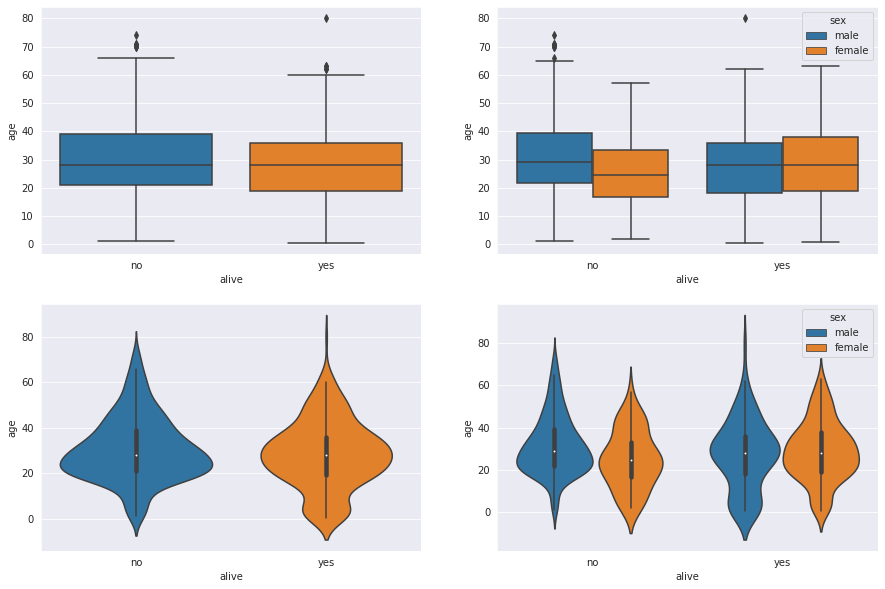

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', data=titanic, ax=ax2, hue='sex')
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax4, hue='sex')

plt.show()

## 조인트 그래프
- 산점도(기본값)

### 산점도

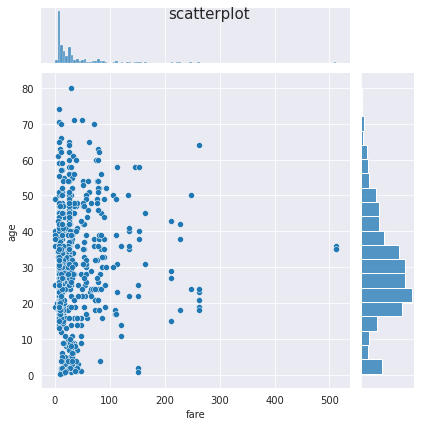

In [ ]:
j1 = sns.jointplot(x='fare', y='age', data=titanic)
j1.fig.suptitle('scatterplot', size=15)
plt.show()

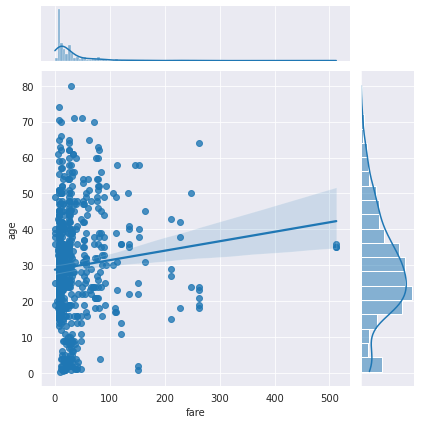

In [ ]:
# 회귀선선
sns.jointplot(x='fare', y='age', data=titanic, kind='reg')
plt.show()

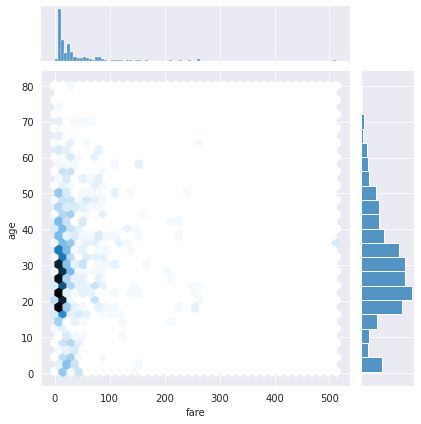

In [ ]:
# 육각형
sns.jointplot(x='fare', y='age', data=titanic, kind='hex')
plt.show()

### 커널 밀집 그래프

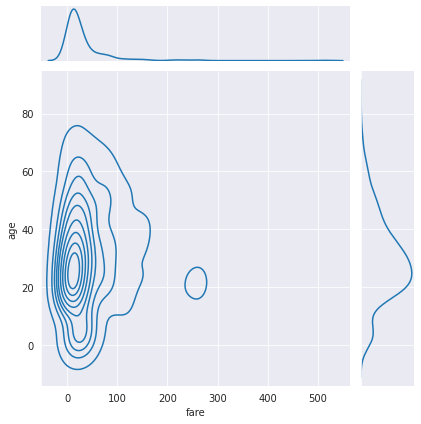

In [ ]:
sns.jointplot(x='fare', y='age', data=titanic, kind='kde')
plt.show()

## 화면 그리드 분할

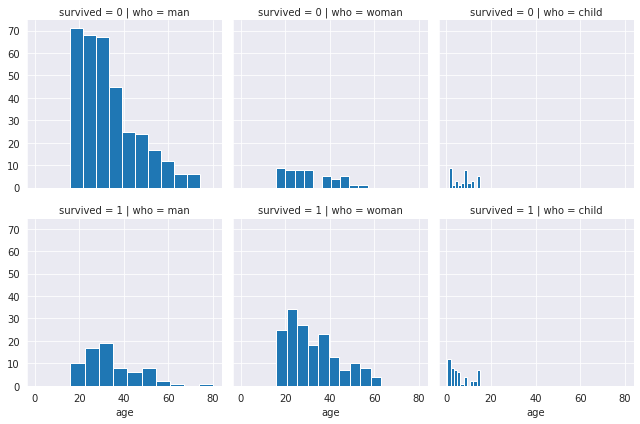

In [ ]:
# 조건에 따라 그래프 나타내기
g = sns.FacetGrid(data=titanic, col='who', row='survived')
g = g.map(plt.hist, 'age')

## 이변수 데이터의 분포

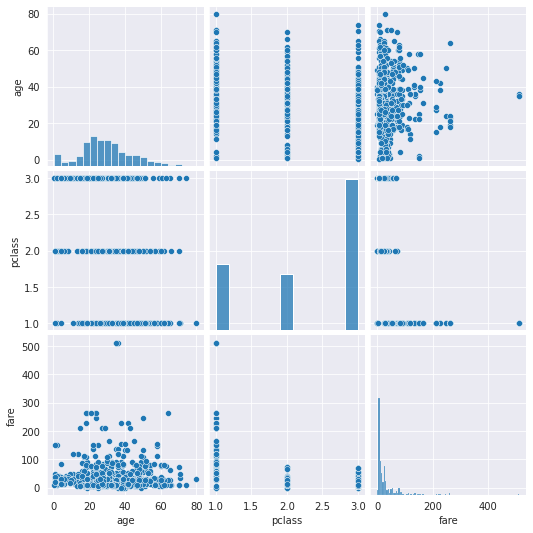

In [ ]:
# 분석 데이터 선택하기
titanic_pair = titanic[['age', 'pclass', 'fare']]
g = sns.pairplot(titanic_pair)

# 조건에 따라 그리드 나누기
